Saving osha_inspection.csv to osha_inspection (1).csv


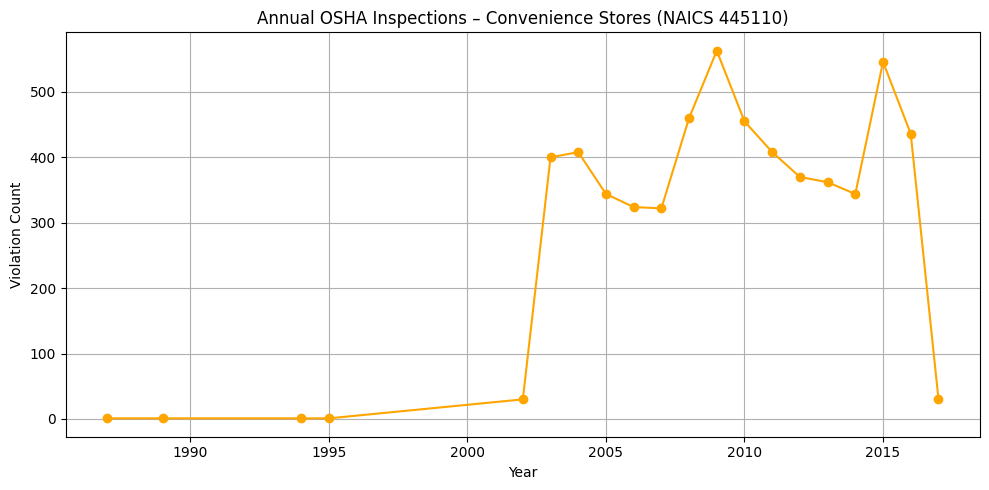

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload CSV file
uploaded = files.upload()

# Load only required columns with correct names
use_cols = ['estab_name', 'site_state', 'naics_code', 'open_date']
df = pd.read_csv("osha_inspection.csv", usecols=use_cols, low_memory=False)

# Rename columns for easier reference
df.columns = ['establishment_name', 'state', 'naics_code', 'inspection_date']

# Filter for NAICS 445110 (Convenience Stores)
df['naics_code'] = pd.to_numeric(df['naics_code'], errors='coerce')
cstore_df = df[df['naics_code'] == 445110].copy()

# Convert inspection date and extract year
cstore_df['inspection_date'] = pd.to_datetime(cstore_df['inspection_date'], errors='coerce')
cstore_df['year'] = cstore_df['inspection_date'].dt.year

# Group by establishment + state
violations_summary = cstore_df.groupby(['establishment_name', 'state']).agg({
    'inspection_date': 'count'
}).reset_index().rename(columns={
    'inspection_date': 'violation_count'
})

# Yearly trend (count of inspections per year)
annual_violations = cstore_df.groupby('year').size().reset_index(name='violation_count')

# Plot violations over time
plt.figure(figsize=(10, 5))
plt.plot(annual_violations['year'], annual_violations['violation_count'], marker='o', color='orange')
plt.title('Annual OSHA Inspections – Convenience Stores (NAICS 445110)')
plt.xlabel('Year')
plt.ylabel('Violation Count')
plt.grid(True)
plt.tight_layout()
plt.show()


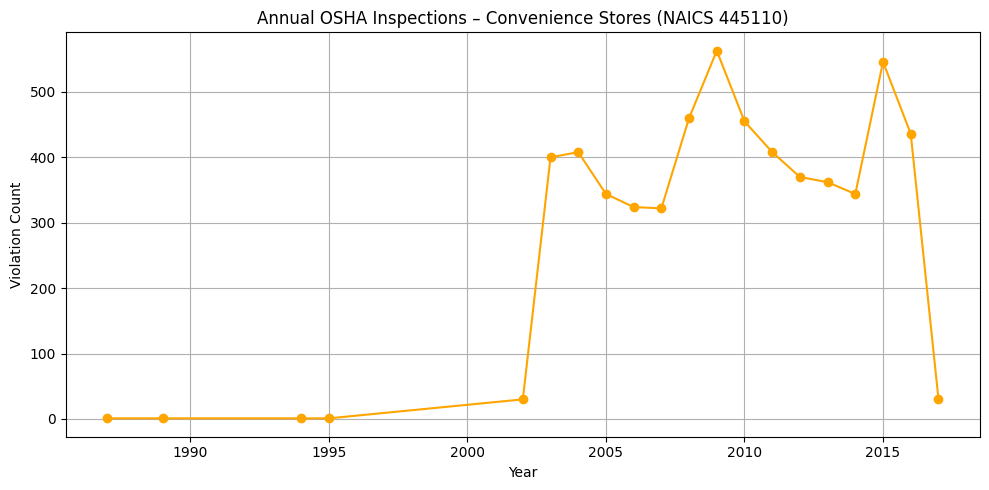

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Save the previous plot to file
plt.figure(figsize=(10, 5))
plt.plot(annual_violations['year'], annual_violations['violation_count'], marker='o', color='orange')
plt.title('Annual OSHA Inspections – Convenience Stores (NAICS 445110)')
plt.xlabel('Year')
plt.ylabel('Violation Count')
plt.grid(True)
plt.tight_layout()

# Save before showing
plt.savefig("osha_trendline.png", dpi=300)
plt.show()
from google.colab import files
files.download("osha_trendline.png")

In [6]:
from google.colab import files
files.download("osha_trendline.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# 🔍 Top 10 States by Number of OSHA Inspections (Convenience Stores)
state_summary = cstore_df['state'].value_counts().reset_index()
state_summary.columns = ['state', 'inspection_count']
print("Top 10 states with the most inspections:")
display(state_summary.head(10))


Top 10 states with the most inspections:


,state,inspection_count
0,CA,1105
1,OR,719
2,WA,666
3,NC,385
4,PR,302
5,MI,224
6,NY,184
7,NV,160
8,IL,159
9,NJ,138


In [10]:
# Export the full state inspection summary as CSV
state_summary.to_csv("osha_top_states.csv", index=False)

# Download the file from Colab to your local machine
from google.colab import files
files.download("osha_top_states.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
!pip install plotly --quiet

import plotly.express as px

# Optional: make sure state codes are uppercase and valid
state_summary['state'] = state_summary['state'].str.upper()

# U.S. State Choropleth Map
fig = px.choropleth(
    state_summary,
    locations='state',
    locationmode='USA-states',
    color='inspection_count',
    color_continuous_scale='Oranges',
    scope='usa',
    labels={'inspection_count': 'Inspections'},
    title='OSHA Inspections by State – Convenience Stores (NAICS 445110)'
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


In [15]:
!pip install -U kaleido --quiet



In [18]:
# Save the interactive choropleth map as an HTML file
fig.write_html("osha_inspections_map.html")

# Download it
from google.colab import files
files.download("osha_inspections_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>